In [2]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df = df.dropna(subset='job_skills')                ## Dropping NaN values

def clean_list(skill):                       
    return ast.literal_eval(skill)                  ## it runs this and changes String to the List data Type
df['job_skills'] = df['job_skills'].apply(clean_list)



In [3]:
# fig, ax = plt.subplots()

In [4]:
df['job_schedule_type'].value_counts().head(3)


job_schedule_type
Full-time     597768
Contractor     30447
Internship      7098
Name: count, dtype: int64

<Axes: xlabel='job_title_short'>

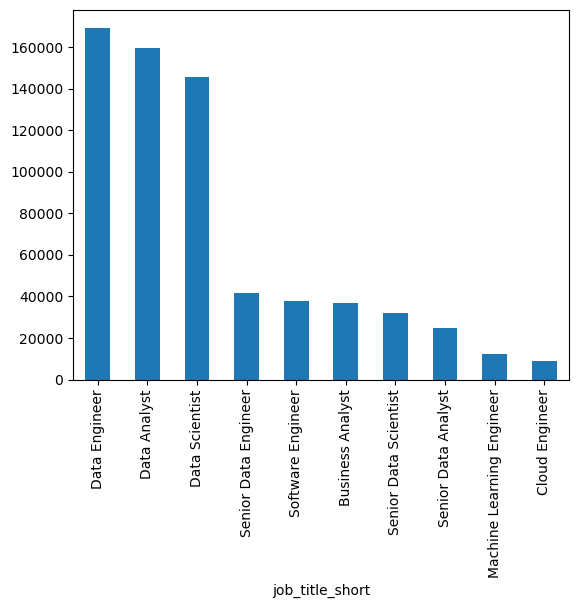

In [5]:
df['job_title_short'].value_counts().plot(kind='bar')

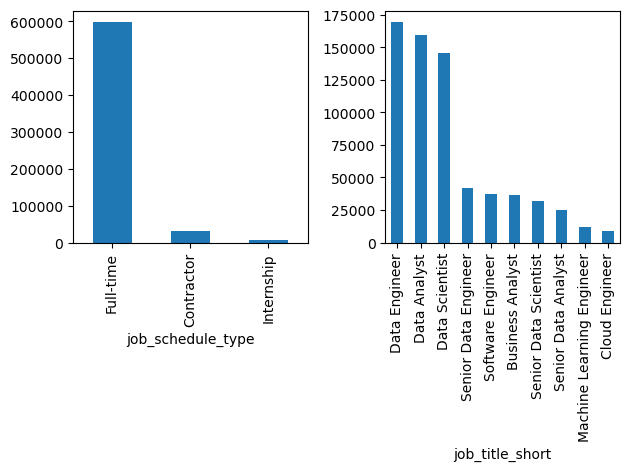

In [6]:
fig, ax = plt.subplots(1, 2)
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
fig.tight_layout()
plt.show()

In [7]:
df_s = df.copy()

df_s = df_s.explode('job_skills')                                                          ## Breaking list into individual rows
df_s = df_s.groupby(['job_title_short', 'job_skills']).size().sort_values(ascending=False) ## Aggregating Skills based on job_titles
df_s = df_s.reset_index(name='count')                                                      ## Converting back to dataframe

df_s

,job_title_short,job_skills,count
0,Data Scientist,python,113711
1,Data Engineer,sql,113130
2,Data Engineer,python,108022
3,Data Analyst,sql,92428
4,Data Scientist,sql,78982
...,...,...,...
2251,Cloud Engineer,delphi,1
2252,Senior Data Scientist,objective-c,1
2253,Senior Data Analyst,couchdb,1
2254,Cloud Engineer,haskell,1


In [8]:
jobs = ['Data Engineer', 'Data Scientist', 'Data Analyst']

0 Data Engineer
1 Data Scientist
2 Data Analyst


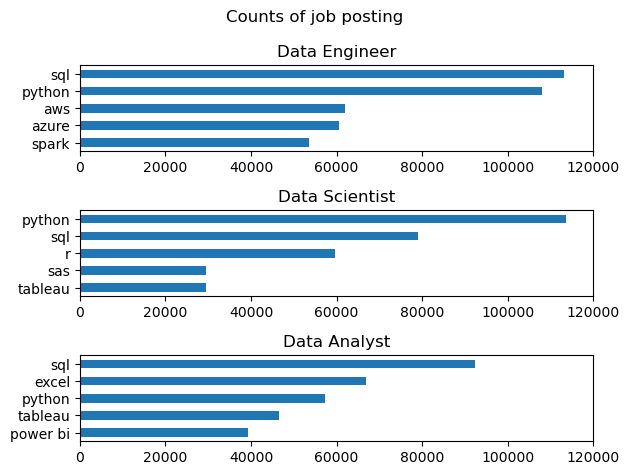

In [9]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(jobs):
    print(i, job_title)
    # print(df_s[df_s['job_title_short']==job_title].head(5))
    df_plot = df_s[df_s['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='count', ax=ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)


fig.suptitle('Counts of job posting')
fig.tight_layout()